In [2]:
import pandas as pd
import backtest
import stat_arb

In [3]:
data = pd.read_pickle("/Users/kylecorrell/Desktop/Quant/Projects/LSTM/data/sp600_max_1d.pkl")["Close"]
data.drop(['MOG.A', 'CWEN.A'], axis=1, inplace=True)
data = data[data.index > "1-1-2020"]

In [4]:
comb_df = stat_arb.get_pairs(data)

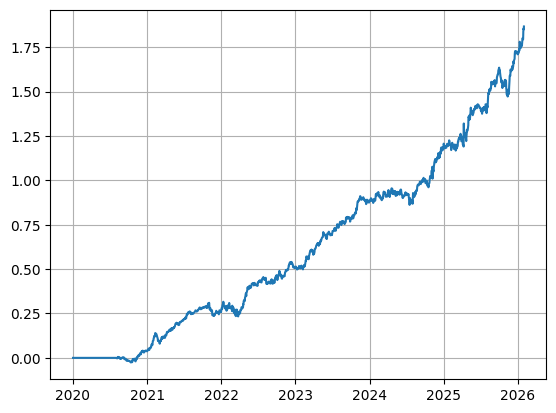

,Stats
SR,1.754133
Max Drawdown,-0.062697
Minimum,-0.025989
Maximum,1.866911
Win Rate,0.555152
Average Win,0.004376
Average Loss,-0.003743
Expected Value,0.000764


In [5]:
stock_pairs =  comb_df.sort_values(by="adf").head(100)
log_returns = stat_arb.stat_arb_backtest(data, stock_pairs, n=150, leverage=3, t_costs=0.0005, z_entry=2)
backtest.plotStrat(log_returns)
backtest.calc_stats(log_returns)